# Executive Summary

**Problem:** Friendly Dog Park has a mushroom overgrowth problem. They need a method for park staff to classify any poisonous mushrooms for removal. While about only 1% of mushroom species are toxic, mushroom poisoning in dogs can cause symptoms like vomiting, kidney failure and even result in death. Treatment must be prompt, and veterinary visits can be expensive.  

**Solution:** Use a classification model to predict the edibility of mushrooms based on various physical characteristics. With this model as a guide, park staff can inspect the grounds daily prior to park opening and remove any potentially poisonous mushrooms. Guides can also be posted on billboards for park guests to reference and follow.

# Data Import and Pre-Processing

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
'''Imported directly from documentation'''
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
#print(mushroom.metadata)

# variable information
#print(mushroom.variables)

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
import pandas as pd

In [ ]:
# combine X and Y for easier cleaning
data = pd.concat([X,y], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
tab = pd.crosstab(data['stalk-root'],data['poisonous'])
print(tab)
data['stalk-root'].unique()

poisonous      e     p
stalk-root            
b           1920  1856
c            512    44
e            864   256
r            192     0


array(['e', 'c', 'b', 'r', nan], dtype=object)

In [ ]:
data.fillna({'stalk-root':'b'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
tab = pd.crosstab(data['stalk-root'],data['poisonous'])
print(tab)
data['stalk-root'].unique()

poisonous      e     p
stalk-root            
b           2640  3616
c            512    44
e            864   256
r            192     0


array(['e', 'c', 'b', 'r'], dtype=object)

Dropped N/A values from the dataframe.



In [ ]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

There were no duplicate values in our dataset.

# Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# create a count plot of poisonous or edible mushrooms
target_labels = {'p':'Poisonous','e':'Edible'}
data['poisonous'] = data['poisonous'].map(target_labels)
print(data['poisonous'])




0       Poisonous
1          Edible
2          Edible
3       Poisonous
4          Edible
          ...    
8119       Edible
8120       Edible
8121       Edible
8122    Poisonous
8123       Edible
Name: poisonous, Length: 8124, dtype: object


<ipython-input-13-42c427c9fd52>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='poisonous',palette='colorblind')


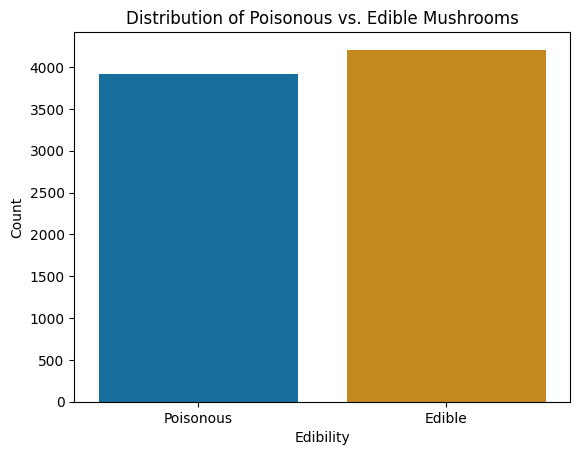

In [ ]:
sns.countplot(data=data, x='poisonous',palette='colorblind')
plt.title('Distribution of Poisonous vs. Edible Mushrooms')
plt.xlabel('Edibility')
plt.ylabel('Count')
plt.show()

In [ ]:
#create a cross tabulation table of target variable vs. bruise presence
cross_tab = pd.crosstab(data['bruises'],data['poisonous'])
cross_tab.rename(index={'f':'No','t':'Yes'},inplace=True)
print(cross_tab)

poisonous  Edible  Poisonous
bruises                     
No           1456       3292
Yes          2752        624


Text(50.722222222222214, 0.5, 'Has Bruises?')

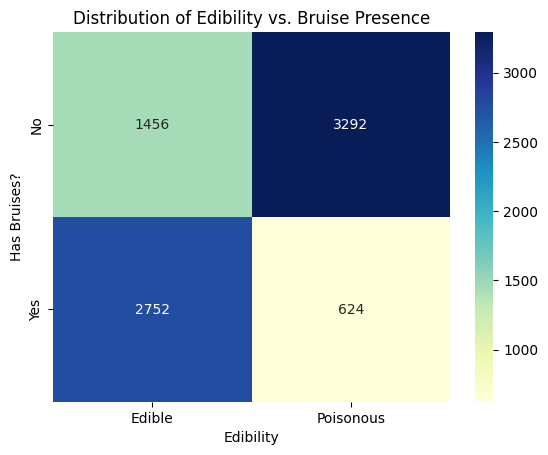

In [ ]:
sns.heatmap(cross_tab,cmap="YlGnBu", fmt='g',annot=True)
plt.title('Distribution of Edibility vs. Bruise Presence')
plt.xlabel('Edibility')
plt.ylabel('Has Bruises?')

In [ ]:
#create a cross tabulation table of target variable vs. bruise presence
cross_tab_shape = pd.crosstab(data['cap-shape'],data['poisonous'])
#cross_tab_shape.index = cross_tab_shape.index.map({'b':'Bell','c':'Conical','x':'Convex','f':'Flat','k':'Knobbed','s':'Sunken'})
cross_tab_shape.rename(index={'b':'Bell','c':'Conical','x':'Convex','f':'Flat','k':'Knobbed','s':'Sunken'}, columns={'0': 'edible','1':'poisonous'},inplace=True)
print(cross_tab_shape)

'''
Encoded Value: 0 -> Label: bell
Encoded Value: 1 -> Label: conical
Encoded Value: 2 -> Label: convex
Encoded Value: 3 -> Label: flat
Encoded Value: 4 -> Label: knobbed
Encoded Value: 5 -> Label: sunken
'''

poisonous  Edible  Poisonous
cap-shape                   
Bell          404         48
Conical         0          4
Flat         1596       1556
Knobbed       228        600
Sunken         32          0
Convex       1948       1708


'\nEncoded Value: 0 -> Label: bell\nEncoded Value: 1 -> Label: conical\nEncoded Value: 2 -> Label: convex\nEncoded Value: 3 -> Label: flat\nEncoded Value: 4 -> Label: knobbed\nEncoded Value: 5 -> Label: sunken\n'

Text(50.722222222222214, 0.5, 'Cap Shape')

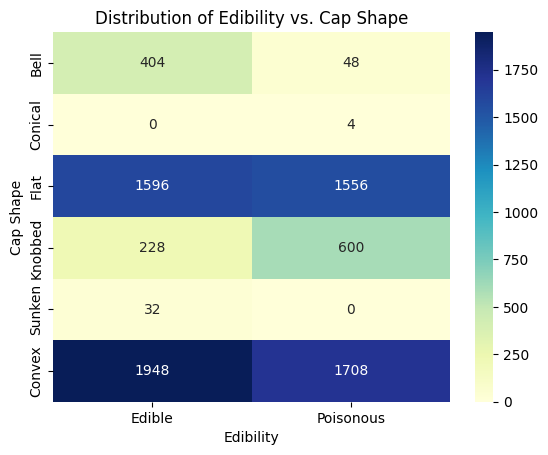

In [ ]:
# create a cross tab heatmap of target vs cap shape
sns.heatmap(cross_tab_shape,cmap="YlGnBu", fmt='g',annot=True)
plt.title('Distribution of Edibility vs. Cap Shape')
plt.xlabel('Edibility')
plt.ylabel('Cap Shape')

In [ ]:
#create a cross tabulation table of target variable vs. bruise presence
cross_tab = pd.crosstab(data['cap-surface'],data['poisonous'])
cross_tab.rename(index={'f':'Fibrous','g':'Grooves','y':'Scaly','s':'Smooth'}, columns={'0': 'edible','1':'poisonous'},inplace=True)
print(cross_tab)

poisonous    Edible  Poisonous
cap-surface                   
Fibrous        1560        760
Grooves           0          4
Smooth         1144       1412
Scaly          1504       1740


Text(50.722222222222214, 0.5, 'Cap Surface')

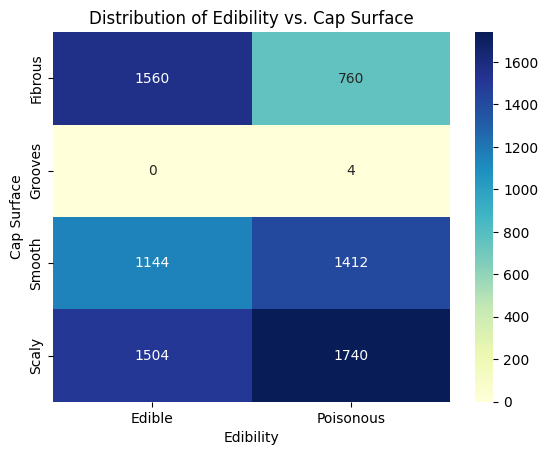

In [ ]:
sns.heatmap(cross_tab,cmap="YlGnBu", fmt='g',annot=True)
plt.title('Distribution of Edibility vs. Cap Surface')
plt.xlabel('Edibility')
plt.ylabel('Cap Surface')

In [ ]:
#create a cross tabulation table of ring type vs. edibility
cross_tab = pd.crosstab(data['ring-type'],data['poisonous'])
cross_tab.rename(index={'c':'Cobwebby','e':'Evanescent','f':'Flaring','l':'Large','n':'None','p':'Pendant','s':'Sheathing','z':'Zone'}, columns={'0': 'edible','1':'poisonous'},inplace=True)
print(cross_tab)

# cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

poisonous   Edible  Poisonous
ring-type                    
Evanescent    1008       1768
Flaring         48          0
Large            0       1296
None             0         36
Pendant       3152        816


Text(50.72222222222221, 0.5, 'Ring Type')

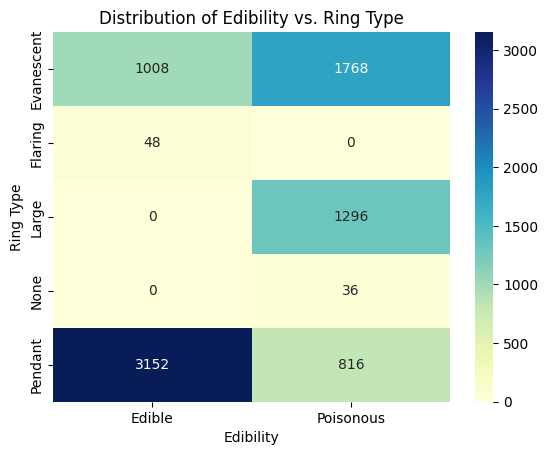

In [ ]:
sns.heatmap(cross_tab,cmap="YlGnBu", fmt='g',annot=True)
plt.title('Distribution of Edibility vs. Ring Type')
plt.xlabel('Edibility')
plt.ylabel('Ring Type')

# Machine Learning Models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# encode categorical values to numerical
from sklearn.preprocessing import LabelEncoder

encoded_labels = {}

for column in data.columns:
  le = LabelEncoder()
  data[column] = le.fit_transform(data[column])
  encoded_labels[column] = le

In [ ]:
#gives us a key so we know what number each label is encoded to
for column, le in encoded_labels.items():
    print(f"Feature Name: {column}")
    for encoded_value, label in enumerate(le.classes_):
      print(f"Encoded Value: {encoded_value} -> Label: {label}")
    print()

Feature Name: cap-shape
Encoded Value: 0 -> Label: b
Encoded Value: 1 -> Label: c
Encoded Value: 2 -> Label: f
Encoded Value: 3 -> Label: k
Encoded Value: 4 -> Label: s
Encoded Value: 5 -> Label: x

Feature Name: cap-surface
Encoded Value: 0 -> Label: f
Encoded Value: 1 -> Label: g
Encoded Value: 2 -> Label: s
Encoded Value: 3 -> Label: y

Feature Name: cap-color
Encoded Value: 0 -> Label: b
Encoded Value: 1 -> Label: c
Encoded Value: 2 -> Label: e
Encoded Value: 3 -> Label: g
Encoded Value: 4 -> Label: n
Encoded Value: 5 -> Label: p
Encoded Value: 6 -> Label: r
Encoded Value: 7 -> Label: u
Encoded Value: 8 -> Label: w
Encoded Value: 9 -> Label: y

Feature Name: bruises
Encoded Value: 0 -> Label: f
Encoded Value: 1 -> Label: t

Feature Name: odor
Encoded Value: 0 -> Label: a
Encoded Value: 1 -> Label: c
Encoded Value: 2 -> Label: f
Encoded Value: 3 -> Label: l
Encoded Value: 4 -> Label: m
Encoded Value: 5 -> Label: n
Encoded Value: 6 -> Label: p
Encoded Value: 7 -> Label: s
Encoded Val

In [ ]:
# separate into target and features for model
X = data.drop(columns='poisonous')
y = data['poisonous']

In [ ]:
# perform feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split


In [ ]:
#select 10 of the most important features
select_features = SelectKBest(chi2, k=10)
selected = select_features.fit_transform(X,y)

In [ ]:
feature_scores = select_features.scores_
feature_pvalues = select_features.pvalues_

In [ ]:
feature_names = X.columns # get the chi2 and p values of all of the features

for name, score, pvalue in zip(feature_names,feature_scores,feature_pvalues):
  print(f"Feature Name: {name}, Chi2 Score: {score:.4f}, p-value: {pvalue:.4f}\n")

Feature Name: cap-shape, Chi2 Score: 17.5084, p-value: 0.0000

Feature Name: cap-surface, Chi2 Score: 214.0685, p-value: 0.0000

Feature Name: cap-color, Chi2 Score: 11.5114, p-value: 0.0007

Feature Name: bruises, Chi2 Score: 1194.2774, p-value: 0.0000

Feature Name: odor, Chi2 Score: 75.9102, p-value: 0.0000

Feature Name: gill-attachment, Chi2 Score: 3.5054, p-value: 0.0612

Feature Name: gill-spacing, Chi2 Score: 826.7953, p-value: 0.0000

Feature Name: gill-size, Chi2 Score: 1636.6068, p-value: 0.0000

Feature Name: gill-color, Chi2 Score: 5957.7645, p-value: 0.0000

Feature Name: stalk-shape, Chi2 Score: 36.5941, p-value: 0.0000

Feature Name: stalk-root, Chi2 Score: 1358.3586, p-value: 0.0000

Feature Name: stalk-surface-above-ring, Chi2 Score: 222.9824, p-value: 0.0000

Feature Name: stalk-surface-below-ring, Chi2 Score: 206.6482, p-value: 0.0000

Feature Name: stalk-color-above-ring, Chi2 Score: 119.7922, p-value: 0.0000

Feature Name: stalk-color-below-ring, Chi2 Score: 109.7

In [ ]:
mask = select_features.get_support()
selected_features = X.columns[mask]
print(f'Based on the Chi 2 test, these show to be the most important features: {selected_features}')

Based on the Chi 2 test, these show to be the most important features: Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [ ]:
# splits the data in to
X_train, X_temp, y_train, y_temp = train_test_split(selected,y,test_size=.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=.5,random_state=42)

# Decision Tree Classifier

In [ ]:
# import necessary modules
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate dt classifier
dt = DecisionTreeClassifier(max_depth=4,class_weight='balanced',random_state=42)

Without the use of the max_depth hyperparameter, the model overfits, with perfect accuracy. However, after tuning this hyperparameter, we see a model that generalizes and performs well overall.

In [ ]:
# fit the model on the training data, which will be validated
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [ ]:
# evaluate the model on the validation set
y_val_predictions = dt.predict(X_val)
val = accuracy_score(y_val,y_val_predictions)
print(val)

0.9470443349753694


In [ ]:
#getting the accuracy, recall, and f1 score to evaluate the model on the test set
y_test_predictions = dt.predict(X_test)
class_report = classification_report(y_test,y_test_predictions,output_dict=True)
print(class_report)

{'0': {'precision': 0.9878048780487805, 'recall': 0.9418604651162791, 'f1-score': 0.9642857142857143, 'support': 430.0}, '1': {'precision': 0.9379652605459057, 'recall': 0.9869451697127938, 'f1-score': 0.9618320610687023, 'support': 383.0}, 'accuracy': 0.9630996309963099, 'macro avg': {'precision': 0.9628850692973431, 'recall': 0.9644028174145365, 'f1-score': 0.9630588876772084, 'support': 813.0}, 'weighted avg': {'precision': 0.9643256978475492, 'recall': 0.9630996309963099, 'f1-score': 0.9631298112326816, 'support': 813.0}}


Text(0.5, 1.0, 'Classification Report Metrics')

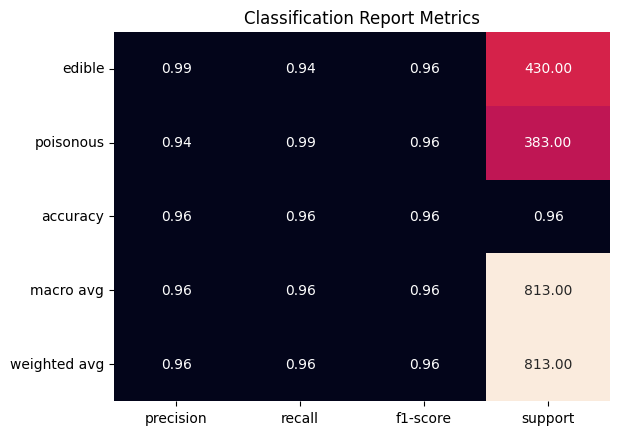

In [ ]:
# create a heatmap of the classification report
report = pd.DataFrame(class_report).transpose()
report.rename(index={'0':'edible','1': 'poisonous'}, inplace=True)
sns.heatmap(report,annot=True,cbar=False, fmt='.2f')
plt.title('Classification Report Metrics')

([<matplotlib.axis.YTick at 0x7d8d52b40750>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

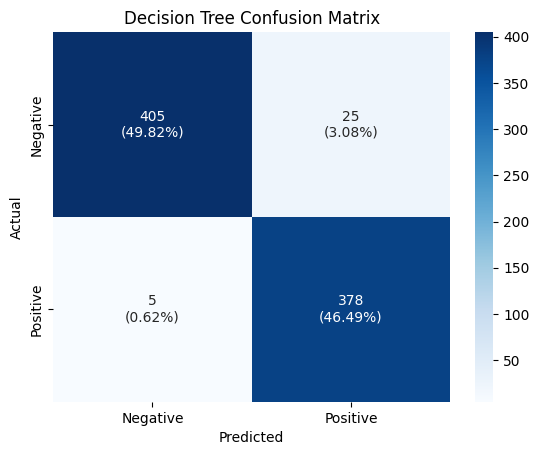

In [ ]:
#create a graph displaying the confusion matrix for the decision tree model

confusion = confusion_matrix(y_test,y_test_predictions)
total = confusion.sum() # get sum of test set observations
annot = [[f"{val}\n({val/total:.2%})" for val in row] for row in confusion] # format the annotations
sns.heatmap(confusion, annot=annot, fmt="",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision Tree Confusion Matrix')
plt.xticks([0.5,1.5],['Negative','Positive'])
plt.yticks([0.5,1.5],['Negative','Positive'])

In [ ]:
# import necessary modules for k folds cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#set the number of k folds, perform k fold cross validation
k = 10
kf = KFold(n_splits=k,shuffle=True,random_state=42)

In [ ]:
# get the accuracy scores for k fold cross validation
k_fold_score = cross_val_score(dt,X_train,y_train, cv=kf,scoring='accuracy')
print("K Fold Accuracy\n" + str(k_fold_score) + "\n")
# f1 score
k_fold_score = cross_val_score(dt,X_train,y_train, cv=kf,scoring='f1')
print("K Fold F1\n" + str(k_fold_score) + "\n")
# roc auc
k_fold_score = cross_val_score(dt,X_train,y_train, cv=kf,scoring='roc_auc')
print("K Fold ROC AUC\n" + str(k_fold_score) + "\n")

K Fold Accuracy
[0.95384615 0.95384615 0.96615385 0.95538462 0.96923077 0.96461538
 0.95846154 0.98       0.96307692 0.96456086]

K Fold F1
[0.95426829 0.9516129  0.96529968 0.95299838 0.96805112 0.96308186
 0.9569378  0.97971919 0.96428571 0.96354992]

K Fold ROC AUC
[0.99506197 0.99406776 0.9970019  0.99501905 0.9968833  0.99692785
 0.99561416 0.99768466 0.99589745 0.99643822]

